In [1]:
from ldpc_bpsk_gaussian_system import LdpcBpskGaussianSystem
from utils import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
N = 1001
n_groups = 10
N_bits = N * n_groups
dv = 3
dc = 7
max_iter = 20
Eb = 1
snr_db_values = np.arange(0, 5.5, 0.5)
N0_values = [N0_from_db_value(i, Eb) for i in snr_db_values]

original = np.zeros(N_bits)
info_bit_error_probas = []

for N0 in N0_values:
    system = LdpcBpskGaussianSystem(N0, dv, dc, N, max_iter)
    decoded_bits_groups = []
    for i in tqdm(range(n_groups)):
        decoded_bits_groups.append(system.apply_noise_and_decode()) 
    decoded_bits_groups = np.array(decoded_bits_groups)
    decoded = decoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas.append(info_bit_error_proba)

  0%|          | 0/10 [00:00<?, ?it/s]

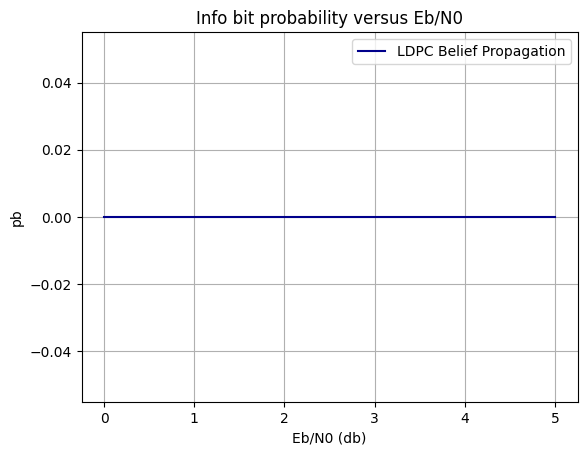

In [72]:
fig, ax = plt.subplots(1, 1)
ax.plot(snr_db_values, info_bit_error_probas, color="darkblue")
ax.grid()
ax.set_title("Info bit probability versus Eb/N0")
ax.set_xlabel("Eb/N0 (db)")
ax.set_ylabel("pb")

ax.legend(["LDPC Belief Propagation"])